In [1]:
import datasets
import jax
import jax.numpy as jnp
import jraph
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# datasets.zinc() and datasets.moltox21() returns a MoleculeJraphDataset object
dataset = datasets.zinc()
test, val, train = dataset.test, dataset.val, dataset.train


In [3]:
def graph_distribution(dataset):
  num_nodes = []
  num_edges = []
  for graph, label in dataset:
    num_nodes.append(np.asarray(graph.n_node).item())
    num_edges.append(np.asarray(graph.n_edge).item())
  plt.hist(num_nodes, bins=100, range=(0, 100))
  plt.title('Number of nodes')
  plt.show()
  plt.hist(num_edges, bins=100, range=(0, 100))
  plt.title('Number of edges')
  plt.show()


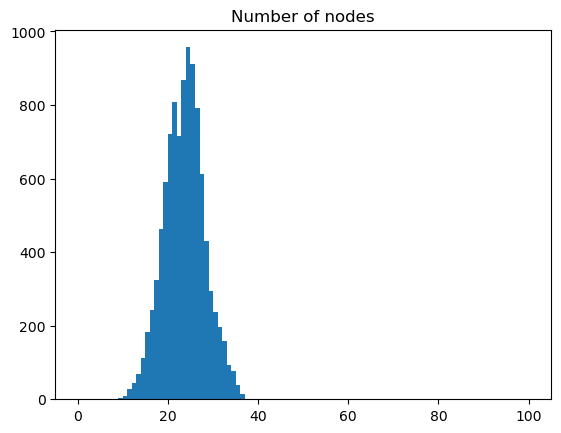

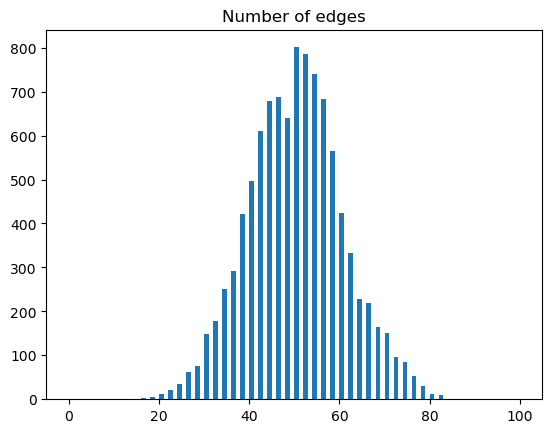

In [4]:
graph_distribution(train)


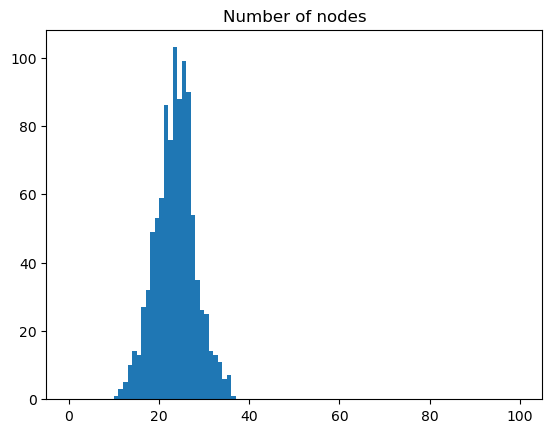

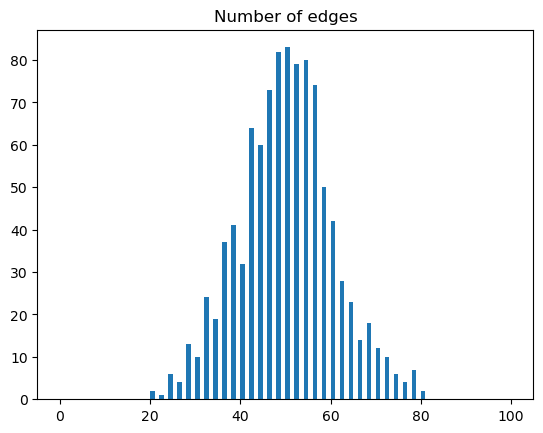

In [5]:
graph_distribution(val)


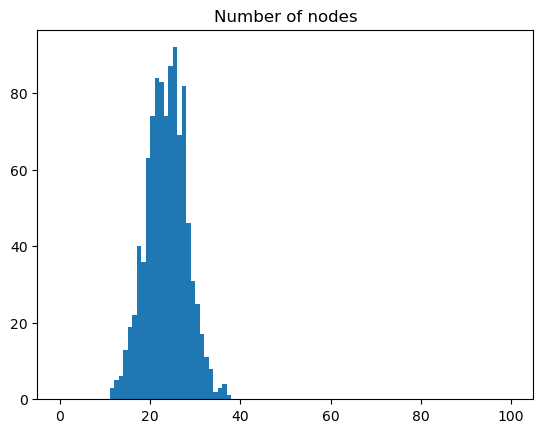

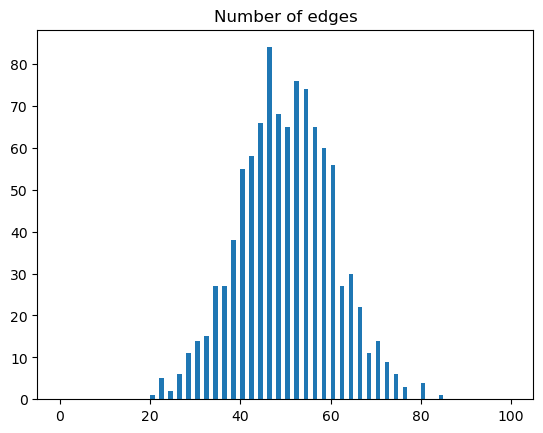

In [6]:
graph_distribution(test)
